In [1]:
%run packages_imported.py
%run EDA.py
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [2]:
df_all_news_processed = pd.read_pickle(r'data/original_data/pickles/df_all_news_processed_post_dataset_distribution')

In [3]:
t1 = time.time() 
X = df_all_news_processed['Text']
Y = df_all_news_processed['Category']
distinct_categories = Y.drop_duplicates()

EDA.process_time(round(time.time()-t1))

Process completed.
Time taken: 0 seconds


## SVM

Full dataset

In [8]:
t1 = time.time() 

tfidfconverter = TfidfVectorizer(min_df=0.0001, max_df=0.98)
X = tfidfconverter.fit_transform(df_all_news_processed['Text']).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

svc = SVC(C= 10, gamma=0.1, kernel='sigmoid', random_state=42)

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))


EDA.process_time(round(time.time()-t1))


MemoryError: Unable to allocate 76.7 GiB for an array with shape (221982, 46391) and data type float64

Small dataset post distribution

In [2]:
df_all_news_processed = pd.read_pickle(r'data/original_data/pickles/df_processed_smaller_before_tuning')

X = df_all_news_processed['Text']
Y = df_all_news_processed['Category']
distinct_categories = Y.drop_duplicates()

In [3]:
t1 = time.time() 

algo_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                     ('svc', SVC(random_state = 42))])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

tuned_parameters = {
    'tfidf__min_df': [0.001, 0.001, 0.0001, 0.00001],
    'tfidf__max_df': [0.98, 0.93, 0.88, 0.83],
    'tfidf__use_idf': (True, False),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'svc__C': [10],
    'svc__gamma': [0.1],
    'svc__kernel': ['sigmoid']
}

svc = GridSearchCV(algo_pipe, tuned_parameters, cv=10, scoring='accuracy')


svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))

print("Best Score: ", svc.best_score_)
print("Best Params: ", svc.best_params_)
EDA.process_time(round(time.time()-t1))

               precision    recall  f1-score   support

entertainment     0.7422    0.8227    0.7804       203
    financial     0.7489    0.7321    0.7404       224
    political     0.6127    0.5955    0.6040       178
        sport     0.8250    0.7674    0.7952       215
   technology     0.6009    0.6995    0.6465       183
       travel     0.7778    0.7151    0.7451       186
        world     0.6734    0.6351    0.6537       211

     accuracy                         0.7121      1400
    macro avg     0.7116    0.7096    0.7093      1400
 weighted avg     0.7154    0.7121    0.7125      1400

Best Score:  0.7246428571428571
Best Params:  {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'sigmoid', 'tfidf__max_df': 0.98, 'tfidf__min_df': 0.0001, 'tfidf__ngram_range': (1, 2), 'tfidf__use_idf': True}
Process completed.
Time taken: 15h 35mins 46secs


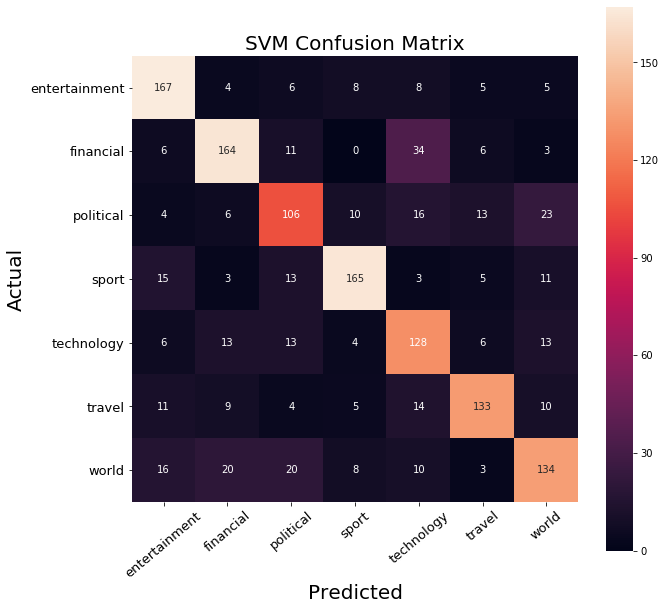

In [4]:
EDA.display_confusion_matrix(y_test, y_pred, distinct_categories, plot_title="SVM Confusion Matrix")

lemma

In [3]:
t1 = time.time() 

df_all_news_processed = pd.read_pickle(r'data/original_data/pickles/df_processed_smaller_lemmatized')

X = df_all_news_processed['Text']
Y = df_all_news_processed['Category']
distinct_categories = Y.drop_duplicates()

tfidfconverter = TfidfVectorizer(min_df=0.0001, max_df=0.98, use_idf=True, ngram_range = (1, 2))
X = tfidfconverter.fit_transform(df_all_news_processed['Text']).toarray()


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

svc = SVC(C= 10, gamma=0.1, kernel='sigmoid', random_state=42)

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
EDA.process_time(round(time.time()-t1))


MemoryError: Unable to allocate 52.2 GiB for an array with shape (7000, 1000249) and data type float64

In [ ]:
EDA.display_confusion_matrix(y_test, y_pred, distinct_categories, plot_title="SVM Confusion Matrix for lemmatized text")

stemmed

In [4]:
t1 = time.time() 

df_all_news_processed = pd.read_pickle(r'data/original_data/pickles/df_processed_smaller_stemmed')

X = df_all_news_processed['Text']
Y = df_all_news_processed['Category']
distinct_categories = Y.drop_duplicates()

tfidfconverter = TfidfVectorizer(min_df=0.0001, max_df=0.98, use_idf=True, ngram_range = (1, 2))
X = tfidfconverter.fit_transform(df_all_news_processed['Text']).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

svc = SVC(C= 10, gamma=0.1, kernel='sigmoid', random_state=42)

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))

print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
EDA.process_time(round(time.time()-t1))


MemoryError: Unable to allocate 49.1 GiB for an array with shape (7000, 941360) and data type float64

In [ ]:
EDA.display_confusion_matrix(y_test, y_pred, distinct_categories, plot_title="SVM Confusion Matrix for stemmed text")

-----

In [ ]:
  accuracy                         0.6957      1400
    macro avg     0.7001    0.6944    0.6944      1400
 weighted avg     0.7038    0.6957    0.6970      1400

Process completed.
Time taken: 39mins 4secs

In [ ]:
"""
1) SVC - GridSearch : Small dataset normal
2) SVC - GridSearch : Small dataset lemma
3) SVC - GridSearch : Small dataset stemmed

4) Display results
5) Final conclusions/notes (mention the memory issue)
6) Future work 
    tuned_parameters = {
        'tfidf__min_df': [0.1, 0.01, 0.001, 0.0001],
        'tfidf__max_df': [0.85, 0.90, 0.98],
        'tfidf__use_idf': (True, False),
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'svc__C': [0.1, 1, 10, 100],
        'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
        'svc__kernel': ['linear', 'rbf', 'sigmoid']
    }
"""